## Notebook : Plot-Query-04
#### Auteur : N. LETEURTRE
#### Date : Mars 2025
#### Formation : BUT Info, SAE204
------

#### Objectif

Prix moyen d'un séjour (taxe comprise) d'un hotel donné sur l'année 2019

#### Import des composants pour la connexion à la base de données

In [1]:
import cx_Oracle
import db_config

#### Création de la connexion à la BD SAE204

In [2]:
vconnect = cx_Oracle.connect(db_config.user,db_config.pwd,db_config.dsn)

#### Requête

##### Nombre de réservation par chambre de chaque hôtel

In [7]:
query = """
        SELECT C.NUMERO AS "Chambres", AVG(RG.TOTAL) AS "Prix moyen d'un séjour"
        FROM RESERVATION_CHAMBRE RC
        JOIN CHAMBRE C ON RC.CHAMBRE = C.ID_CHAMBRE
        JOIN REGLEMENT RG ON RC.RESERVATION = RG.RESERVATION
        WHERE C.HOTEL = :v_id_hotel
        GROUP BY C.NUMERO
        ORDER BY C.NUMERO
        """

#### Execution de la requête

In [8]:
vcursor = vconnect.cursor()
id = 3
vcursor.execute(query, v_id_hotel = id)

<cx_Oracle.Cursor on <cx_Oracle.Connection to nleteurt@193.48.38.244:80/SAE204>>

#### Dictionnaire des colonnes du résultat de la requête

In [9]:
columns_info = vcursor.description

#### Import de la librairie ```matplotlib``` et l'interface pyplot
##### Pour plus d'informations :https//matplotlib.org/

In [10]:
!pip install matplotlib
import matplotlib.pyplot as plot

/opt/conda/lib/python3.9/site-packages/numpy/_core/getlimits.py:545: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


#### Visualisation du résultat de la requête<br>

##### Extraction ded données des axes X et Y

In [11]:
x_data = []
y_data = []

data = vcursor.fetchall()
for row in data:
    x_data.append(row[0])
    y_data.append(row[1])

#### Création et configuration de la visualisation

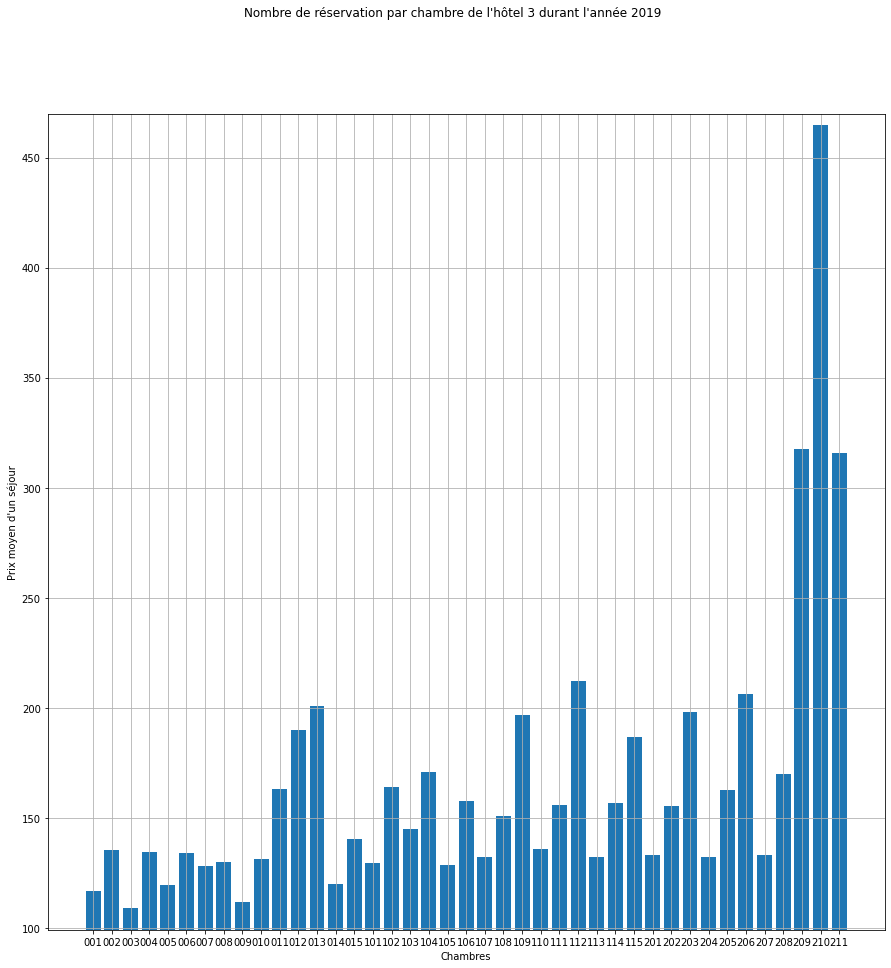

In [13]:
#figure = plot.figure()
plot.figure()

plot.rcParams["figure.figsize"] = [15,4]
#plt.rcParams["figure.autolayout"] = True

#axis = figure.add_subplot(111)
plot.subplot(111)
plot.ylim(min(y_data)-10, max(y_data)+5)
plot.bar(x_data, y_data)
#plt.xticks(x_data)

plot.grid(True)
plot.xlabel(columns_info[0][0])
plot.ylabel(columns_info[1][0])
plot.suptitle("Nombre de réservation par chambre de l'hôtel %s durant l'année 2019"%(id))
plot.show() 

#### Pour stopper la connexion (obligatoire)

In [14]:
vcursor.close()
vconnect.close()